In [1]:
import xarray as xr


# Regridding methods testing
Compared xarray interp_like function with cdo remapXX functionality for several remapping methods.
This should be done for all regridding methods which we want to use.

Note cdo is the reference implementation for regridding here.
```bash
cdo remapMETHOD,r360x180 $infile $outfile 
```
was used to regrid the data.

## Xarray interplike (non specialized standard xarray function)
- Conservative and distance weighted average are not supported by xarray interplike.
- cubic not working

See plots

In [2]:
#Laod the datasets created by cdo remap
ds = xr.open_dataset("data/tas_Amon_EC-Earth3-Veg_historical_r1i1p1f1_gr_195301-195312.nc")
ds_bicubic = xr.open_dataset("data/regrids/cdo_bicubic.nc")
ds_bilinear = xr.open_dataset("data/regrids/cdo_bilinear.nc")
ds_conservative = xr.open_dataset("data/regrids/cdo_conservative.nc")
ds_dis_w_avg = xr.open_dataset("data/regrids/cdo_dis_w_avg.nc")
ds_nearest_neighbor = xr.open_dataset("data/regrids/cdo_nearest_neighbor.nc")

In [3]:
ds_nearest_neighbor

<xarray.Dataset> Size: 3MB
Dimensions:    (time: 12, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) datetime64[ns] 96B 1953-01-16T12:00:00 ... 1953-12-16T1...
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 192B ...
    tas        (time, lat, lon) float32 3MB ...
Attributes: (12/48)
    CDI:                                Climate Data Interface version 2.1.1 ...
    source:                             EC-Earth3-Veg (2019): \naerosol: none...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    branch_method:                      standard
    ...                                 ...
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.4.0
    tracking_id:                        hdl:21.14100/18af2970-6a17-45fe-b629-...
    history:                            Wed Apr 17 16:11:16 2024: cdo remapnn...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 2.1.1 ...

In [4]:

#Compare these methods to the xarray interp method:

# Bilinear interpolation
ds_bicubic_xr = ds.interp_like(ds_bicubic, method="cubic")
ds_bilinear_xr = ds.interp_like(ds_bilinear, method="linear")
#ds_conservative_xr = ds.interp_like(ds_conservative, method=??)
#ds_dis_w_avg_xr = ds.interp_like(ds_dis_w_avg, method=??)
ds_nearest_neighbor_xr = ds.interp_like(ds_nearest_neighbor, method="nearest")

In [5]:
ds_bicubic_xr-ds_bicubic

<xarray.Dataset> Size: 6MB
Dimensions:  (time: 12, lat: 180, lon: 360)
Coordinates:
    height   float64 8B 2.0
  * time     (time) datetime64[ns] 96B 1953-01-16T12:00:00 ... 1953-12-16T12:...
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Data variables:
    tas      (time, lat, lon) float64 6MB nan nan nan nan ... nan nan nan nan

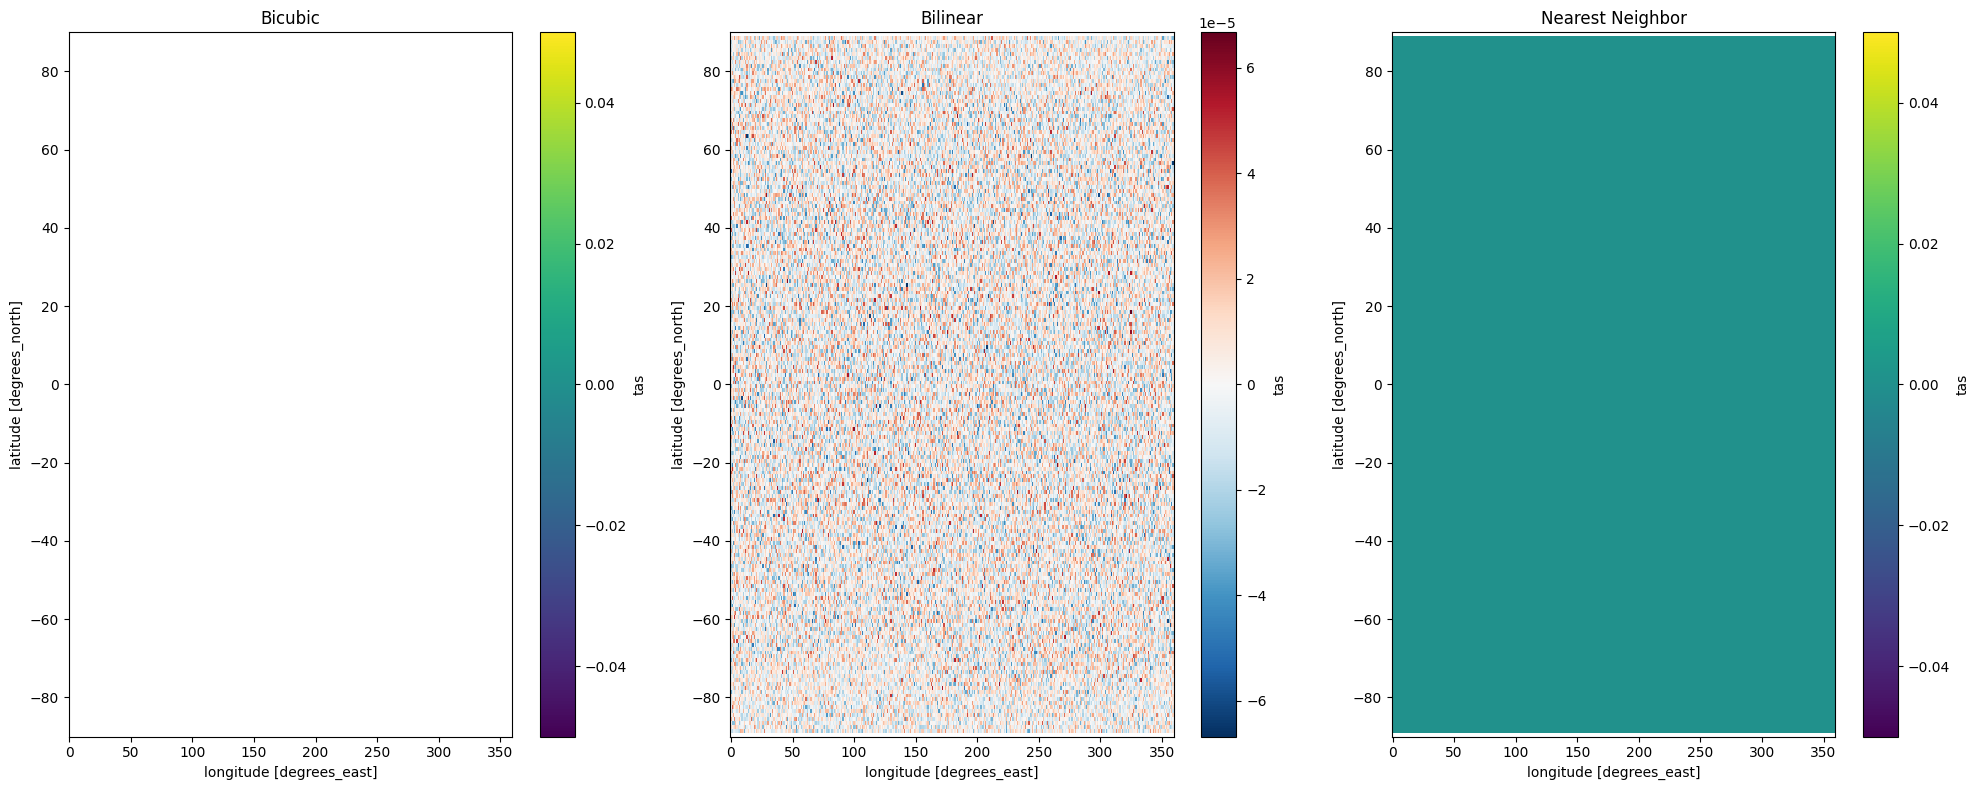

In [6]:

# Compare the results of the regridding methods by suptracting there means in a spatial plot facetted per interpolation type

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 8))

(ds_bicubic_xr.mean(dim=["time"]) - ds_bicubic.mean(dim=["time"])).tas.plot(ax=axs[0])
axs[0].set_title("Bicubic")
(ds_bilinear_xr.mean(dim=["time"]) - ds_bilinear.mean(dim=["time"])).tas.plot(ax=axs[1])
axs[1].set_title("Bilinear")
#(ds_conservative_xr.mean(dim=["lat", "lon"]) - ds_conservative.mean(dim=["lat", "lon"])).tas.plot(ax=axs[0, 2])
#axs[0, 2].set_title("Conservative")
#(ds_dis_w_avg_xr.mean(dim=["lat", "lon"]) - ds_dis_w_avg.mean(dim=["lat", "lon"])).tas.plot(ax=axs[1, 0])
#axs[1, 0].set_title("Dis-W Avg")
(ds_nearest_neighbor_xr.mean(dim=["time"]) - ds_nearest_neighbor.mean(dim=["time"])).tas.plot(ax=axs[2])
axs[2].set_title("Nearest Neighbor")

#Use one colorbar for all plots
plt.tight_layout()
plt.show()

In [7]:
ds.interp_like(ds_bicubic, method="cubic")

<xarray.Dataset> Size: 6MB
Dimensions:   (lat: 180, bnds: 2, lon: 360, time: 12)
Coordinates:
    height    float64 8B 2.0
  * time      (time) datetime64[ns] 96B 1953-01-16T12:00:00 ... 1953-12-16T12...
  * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 3kB nan nan -88.84 -88.15 ... 88.84 nan nan
    lon_bnds  (lon, bnds) float64 6kB -0.3516 0.3516 0.6484 ... 358.6 359.4
    tas       (time, lat, lon) float64 6MB nan nan nan nan ... nan nan nan nan
Attributes: (12/46)
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    branch_method:                      standard
    branch_time_in_child:               0.0
    branch_time_in_parent:              29219.0
    contact:                            cmip6-data@ec-earth.org
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.4.0
    tracking_id:                        hdl:21.14100/18af2970-6a17-45fe-b629-...
    history:                            2019-06-06T07:27:13Z ; CMOR rewrote d...
    latest_applied_cmor_fixer_version:  v3.0

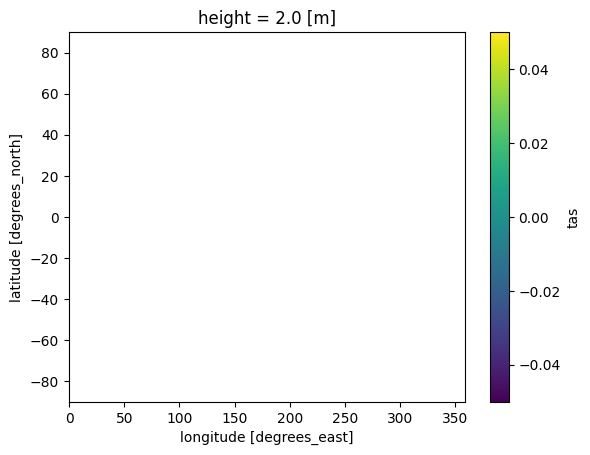

In [8]:
ds.interp_like(ds_bicubic, method="cubic").mean(dim=["time"]).tas.plot() #Cubic xarray not working
#This is because the interp_like method uses scipy interpolation methods, which do not support cubic interpolation for n-dimensional data.